<a href="https://colab.research.google.com/github/dulrojas/machinelearning-az/blob/master/Solucion_Reto_SC_63_Mauro_Rojas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reto | Mercadotecnia telefónica con aprendizaje supervisado**

###1.    Deberás utilizar el archivo llamado bank_marketing.csv. con los datos de problema.
###2.    Utilizar el archivo bank-names.txt para obtener información de cada una de las variables.
###3.    Crear un proyecto tipo Jupyter Notebook en Google-Colab llamado Solucion_Reto_SC_63_<nombre_y_apellido_del_estudiante>.ipynb.
###4.    Incluye las librerías que consideres adecuadas y carga los datos del archivo en una variable llamada “data”.

In [34]:
# Importamos librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_regression, make_classification
from sklearn.neural_network import MLPClassifier

In [39]:
# Ruta al archivo CSV en Google Drive
csv_path = '/content/drive/MyDrive/Colab Notebooks/17 Aprendizaje Supervisado/bank_marketing_RETO_DS_AS.csv'
# Leer el archivo
data = pd.read_csv(csv_path)
# Imprimir cabecera
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,31,self-employed,married,tertiary,no,2666,no,no,cellular,10,nov,318,2,97,6,success,yes
1,29,unemployed,single,unknown,no,1584,no,no,cellular,6,sep,245,1,-1,0,unknown,yes
2,41,blue-collar,married,secondary,no,2152,yes,no,cellular,17,nov,369,1,-1,0,unknown,no
3,50,blue-collar,married,secondary,no,84,yes,no,cellular,17,jul,18,8,-1,0,unknown,no
4,40,admin.,married,secondary,no,0,no,no,cellular,28,jul,496,2,182,11,success,yes


### 5. Obtener la información de dicha base de datos que incluya el número de registros, el total de variables, el tipo de cada variable, la cantidad de datos perdidos de cada variable en caso de que existan.

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        9000 non-null   int64 
 1   job        9000 non-null   object
 2   marital    9000 non-null   object
 3   education  9000 non-null   object
 4   default    9000 non-null   object
 5   balance    9000 non-null   int64 
 6   housing    9000 non-null   object
 7   loan       9000 non-null   object
 8   contact    9000 non-null   object
 9   day        9000 non-null   int64 
 10  month      9000 non-null   object
 11  duration   9000 non-null   int64 
 12  campaign   9000 non-null   int64 
 13  pdays      9000 non-null   int64 
 14  previous   9000 non-null   int64 
 15  poutcome   9000 non-null   object
 16  y          9000 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.2+ MB


### 6. Transforma las variables categóricas de manera que puedan ser tratadas numéricamente. Justifica si utilizas LabelEncoder o OneHotEcoder.

In [40]:
# Transformamos todos los campos yes/no a 1/0 con label encoder
# Crea una instancia de LabelEncoder
label_encoder = LabelEncoder()
# Transforma los datos de la columna 'default'
data['default'] = label_encoder.fit_transform(data['default'].str.replace('1', ''))
# Transforma los datos de la columna 'housing'
data['housing'] = label_encoder.fit_transform(data['housing'].str.replace('1', ''))
# Transforma los datos de la columna 'loan'
data['loan'] = label_encoder.fit_transform(data['loan'].str.replace('1', ''))
# Transforma los datos de la columna 'y'
data['y'] = label_encoder.fit_transform(data['y'].str.replace('1', ''))

# Transformamos "month" con LabelEncoder ya que tiene jerarquía en sus datos
# Ajusta y transforma los datos de la columna 'month'
data['month'] = label_encoder.fit_transform(data['month'])

# Transformamos el campo "education" con Ordinal Encoding ya que tienen una jerarquía
# Definir el orden lógico de los niveles de educación
orden_educacion = ['unknown','primary', 'secondary', 'tertiary' ]
# Crear el codificador ordinal con el orden especificado
ordinal_encoder = OrdinalEncoder(categories=[orden_educacion])
# Ajustar el codificador y transformar los datos de educación
data['education'] = ordinal_encoder.fit_transform(data[['education']])

# Transformamos otras variables usando One-Hot Encoder ya que no existe una relación númerica jerárquica entre ellos
# Aplicar one-hot encoding a la columna 'job'
data_encoded = pd.get_dummies(data['job'], prefix='job')
data = pd.concat([data, data_encoded], axis=1)
# Aplicar one-hot encoding a la columna 'marital'
data_encoded = pd.get_dummies(data['marital'], prefix='marital')
data = pd.concat([data, data_encoded], axis=1)
# Aplicar one-hot encoding a la columna 'contact'
data_encoded = pd.get_dummies(data['contact'], prefix='contact')
data = pd.concat([data, data_encoded], axis=1)
# Aplicar one-hot encoding a la columna 'poutcome'
data_encoded = pd.get_dummies(data['poutcome'], prefix='poutcome')
data = pd.concat([data, data_encoded], axis=1)

# Borramos columnas que no son relevantes luego de transformaciones y limpieza
data.drop("job", axis=1, inplace=True) # Borramos columna original que ya no es necesaria
data.drop("marital", axis=1, inplace=True) # Borramos columna original que ya no es necesaria
data.drop("contact", axis=1, inplace=True) # Borramos columna original que ya no es necesaria
data.drop("poutcome", axis=1, inplace=True) # Borramos columna original que ya no es necesaria

data.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,31,3.0,0,2666,0,0,10,9,318,2,...,False,True,False,True,False,False,False,False,True,False
1,29,0.0,0,1584,0,0,6,11,245,1,...,False,False,True,True,False,False,False,False,False,True
2,41,2.0,0,2152,1,0,17,9,369,1,...,False,True,False,True,False,False,False,False,False,True
3,50,2.0,0,84,1,0,17,5,18,8,...,False,True,False,True,False,False,False,False,False,True
4,40,2.0,0,0,0,0,28,5,496,2,...,False,True,False,True,False,False,False,False,True,False


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                9000 non-null   int64  
 1   education          9000 non-null   float64
 2   default            9000 non-null   int64  
 3   balance            9000 non-null   int64  
 4   housing            9000 non-null   int64  
 5   loan               9000 non-null   int64  
 6   day                9000 non-null   int64  
 7   month              9000 non-null   int64  
 8   duration           9000 non-null   int64  
 9   campaign           9000 non-null   int64  
 10  pdays              9000 non-null   int64  
 11  previous           9000 non-null   int64  
 12  y                  9000 non-null   int64  
 13  job_admin.         9000 non-null   bool   
 14  job_blue-collar    9000 non-null   bool   
 15  job_entrepreneur   9000 non-null   bool   
 16  job_housemaid      9000 

### 7. Transforma las variables numéricas en los casos que se tenga algún tipo de sesgo.

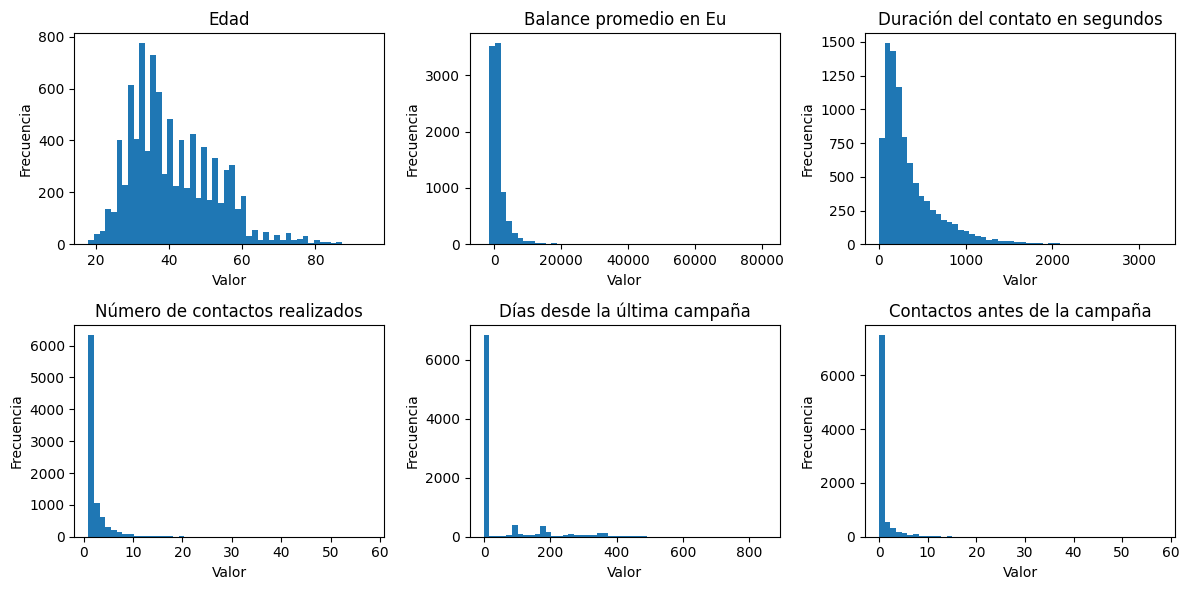

In [42]:
# Crear una figura y ejes para los subgráficos
fig, axs = plt.subplots(2, 3, figsize=(12, 6))
for ax in fig.axes:
    ax.set_xlabel('Valor')
    ax.set_ylabel('Frecuencia')

axs[0,0].hist(data['age'],bins =50)
axs[0,0].set_title('Edad')

axs[0,1].hist(data['balance'],bins =50)
axs[0,1].set_title('Balance promedio en Eu')

axs[0,2].hist(data['duration'],bins =50)
axs[0,2].set_title('Duración del contato en segundos')

axs[1,0].hist(data['campaign'],bins =50)
axs[1,0].set_title('Número de contactos realizados')

axs[1,1].hist(data['pdays'],bins =50)
axs[1,1].set_title('Días desde la última campaña')

axs[1,2].hist(data['previous'],bins =50)
axs[1,2].set_title('Contactos antes de la campaña')
# Ajustar el espaciado entre los subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

In [8]:
data.describe()

,age,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,41.090556,2.099444,0.015000,1482.262778,0.492889,0.131111,15.619556,5.462667,353.832778,2.520111,50.511333,0.788889,0.420778
std,11.664253,0.785749,0.121559,3031.013197,0.499977,0.337541,8.345305,3.147263,336.945158,2.737758,107.691963,2.210273,0.493711
min,18.000000,0.000000,0.000000,-3058.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,2.000000,0.000000,109.000000,0.000000,0.000000,8.000000,3.000000,131.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,2.000000,0.000000,519.000000,0.000000,0.000000,15.000000,6.000000,240.500000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,3.000000,0.000000,1646.500000,1.000000,0.000000,21.000000,8.000000,462.000000,3.000000,-1.000000,0.000000,1.000000
max,95.000000,3.000000,1.000000,81204.000000,1.000000,1.000000,31.000000,11.000000,3253.000000,58.000000,850.000000,58.000000,1.000000


In [43]:
# antes de aplicar logaritmo, volvemos los datos que tienen datos negativos en positivos
data['balance'] = data['balance'] + abs(data['balance'].min()) +1
data['pdays'] = data['pdays'] + abs(data['pdays'].min()) +1
data['previous'] = data['previous'] + abs(data['previous'].min()) +1

In [44]:
# Aplica la transformación logarítmica a los campos con sesgo positivo
data['age'] = np.log(data['age'])
data['balance'] = np.log(data['balance'])
data['duration'] = np.log(data['duration'])
data['campaign'] = np.log(data['campaign'])
data['pdays'] = np.log(data['pdays'])
data['previous'] = np.log(data['previous'])

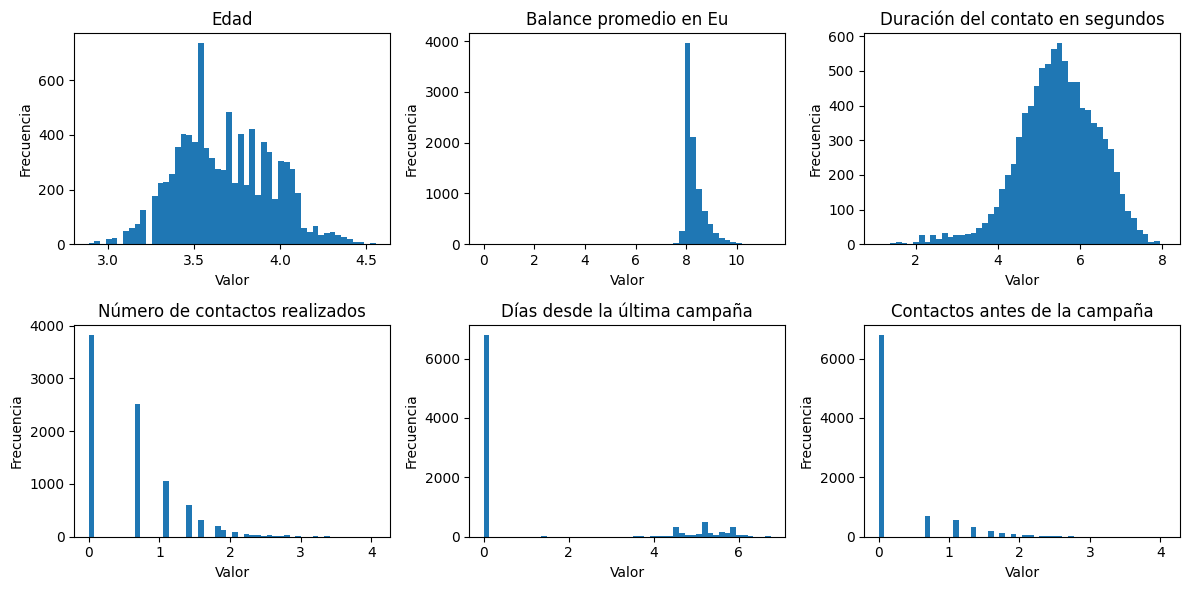

In [45]:
# Crear una figura y ejes para los subgráficos
fig, axs = plt.subplots(2, 3, figsize=(12, 6))
for ax in fig.axes:
    ax.set_xlabel('Valor')
    ax.set_ylabel('Frecuencia')

axs[0,0].hist(data['age'],bins =50)
axs[0,0].set_title('Edad')

axs[0,1].hist(data['balance'],bins =50)
axs[0,1].set_title('Balance promedio en Eu')

axs[0,2].hist(data['duration'],bins =50)
axs[0,2].set_title('Duración del contato en segundos')

axs[1,0].hist(data['campaign'],bins =50)
axs[1,0].set_title('Número de contactos realizados')

axs[1,1].hist(data['pdays'],bins =50)
axs[1,1].set_title('Días desde la última campaña')

axs[1,2].hist(data['previous'],bins =50)
axs[1,2].set_title('Contactos antes de la campaña')
# Ajustar el espaciado entre los subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

### 8. Considera la variable “y” como la variable de salida y el resto de las variables como las variables de entrada.

In [46]:
X = data[['age', 'education', 'default', 'balance', 'housing', 'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
          'job_admin.','job_blue-collar' ,'job_entrepreneur','job_housemaid','job_management','job_retired','job_self-employed',
          'job_services','job_student','job_technician','job_unemployed','job_unknown','marital_divorced','marital_married',
          'marital_single','contact_cellular','contact_telephone','contact_unknown','poutcome_failure','poutcome_other',
          'poutcome_success','poutcome_unknown' ]]
Y = data[['y']]

In [47]:
X.info()
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                9000 non-null   float64
 1   education          9000 non-null   float64
 2   default            9000 non-null   int64  
 3   balance            9000 non-null   float64
 4   housing            9000 non-null   int64  
 5   loan               9000 non-null   int64  
 6   day                9000 non-null   int64  
 7   month              9000 non-null   int64  
 8   duration           9000 non-null   float64
 9   campaign           9000 non-null   float64
 10  pdays              9000 non-null   float64
 11  previous           9000 non-null   float64
 12  job_admin.         9000 non-null   bool   
 13  job_blue-collar    9000 non-null   bool   
 14  job_entrepreneur   9000 non-null   bool   
 15  job_housemaid      9000 non-null   bool   
 16  job_management     9000 

### 9. Particiona los datos en los conjuntos de entrenamiento, validación y prueba en 60%, 20% y 20%, respectivamente.

In [48]:
# Particionamos los conjuntos
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(X, Y, train_size=.60)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.50)

print("Dimensión X_train:\t\t", x_train.shape)
print("Dimensión X_validation:\t\t", x_validation.shape)
print("Dimension X_test:\t\t", x_test.shape)

print("\nDimensión Y_train:\t\t", y_train.shape)
print("Dimension Y_validación:\t\t", y_validation.shape)
print("Dimensión Y_test:\t\t", y_test.shape)


Dimensión X_train:		 (5400, 34)
Dimensión X_validation:		 (1800, 34)
Dimension X_test:		 (1800, 34)

Dimensión Y_train:		 (5400, 1)
Dimension Y_validación:		 (1800, 1)
Dimensión Y_test:		 (1800, 1)


### 10. Aplica el modelo Regresión Logística en el conjunto de entrenamiento. Valida el modelo con las predicciones del conjunto de validación y su matriz de confusión. Ajusta los parámetros del modelo hasta obtener tu mejor resultado.

In [56]:
# Entrenamos el modelo
clf = LogisticRegression( C=1.0, solver='newton-cg' )
modelo_RL = clf.fit( x_train, y_train )

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [57]:
# Validamos el modelo
print("Exactitud (accuracy) con el conjunto de Validación = ", modelo_RL.score(x_validation, y_validation))

Exactitud (accuracy) con el conjunto de Validación =  0.8344444444444444


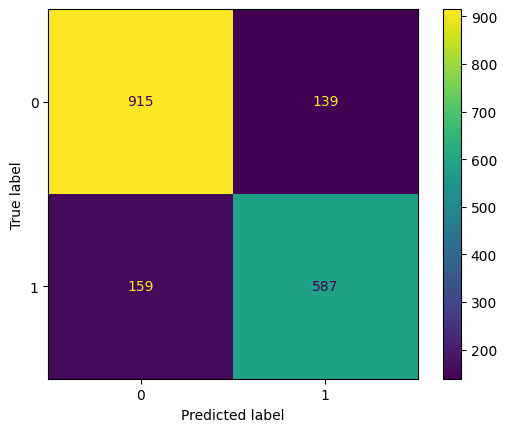

In [58]:
# Obtenemos la matriz de confusión
pr = modelo_RL.predict(x_validation)
cm = confusion_matrix(y_validation, pr)
ConfusionMatrixDisplay(cm).plot()

In [59]:
# AJustamos para obtener el mejor resultado
# Definimos diferentes rangos de opciones para los parámetros
parameters = {'C':[0.1, 0.15, 0.18, 0.2, 0.22, 0.24, 0.28, 0.3],
              'penalty':('l2','elasticnet', 'None'),
              'solver':('newton-cg','saga','lbfgs','sag')}
# Usamos la función GridSearchCV para la malla de búsqueda de combinaciones de los parámetros
RL_grid = LogisticRegression(max_iter=10000)
modelo_RL_grid = GridSearchCV(RL_grid, parameters)

modelo_RL_grid.fit(x_train, np.ravel(y_train))

print(modelo_RL_grid)

print("Los mejores valores encontrados son %s con un score de %0.2f"
      % (modelo_RL_grid.best_params_, modelo_RL_grid.best_score_))

print(modelo_RL_grid.score(x_test, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
320 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Sol

GridSearchCV(estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.1, 0.15, 0.18, 0.2, 0.22, 0.24, 0.28, 0.3],
                         'penalty': ('l2', 'elasticnet', 'None'),
                         'solver': ('newton-cg', 'saga', 'lbfgs', 'sag')})
Los mejores valores encontrados son {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'} con un score de 0.80
0.8227777777777778


In [60]:
# Probamos el entrenamiento con los mejores valores encontrados
modelo_RL_tmp = LogisticRegression( C=0.1, penalty='l2', solver='lbfgs',max_iter=1000)
modelo_RL_tmp.fit( x_train, np.ravel(y_train) )
print(modelo_RL_tmp.score(x_validation, y_validation))


0.8338888888888889


### 11. Aplica el modelo Red Neuronal en el conjunto de entrenamiento. Valida el modelo con las predicciones del conjunto de validación y su matriz de confusión. Ajusta los parámetros del modelo hasta obtener tu mejor modelo, entre ellos el número de neuronas y capas ocultas.

In [62]:
modelo_NN = MLPClassifier(hidden_layer_sizes=(15, 4), max_iter=1000)
modelo_NN.fit(x_train, np.ravel(y_train))
print(modelo_NN.score(x_validation, y_validation))

0.8383333333333334


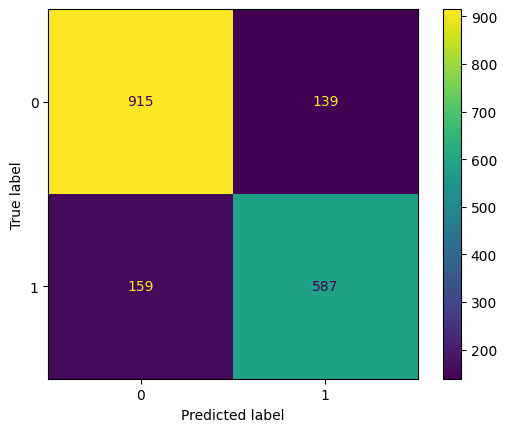

In [63]:
# Obtenemos la matriz de confusión
pr = modelo_RL.predict(x_validation)
cm = confusion_matrix(y_validation, pr)
ConfusionMatrixDisplay(cm).plot()

In [70]:
# Ajustamos para obtener el mejor resultado
# Definamos el vector de neuronas que tendrá cada capa oculta en cada iteración:
neuronas = [i for i in range(1, 90, 5)]
# Se define e inicia las lista donde se guarda la información de la exactitud y errores de los conjuntos de entrenamiento y prueba:
train_scores, test_scores = list(), list()
train_errors, test_errors = list(), list()
for i in neuronas:
  model = MLPClassifier(hidden_layer_sizes=(i,i),
                        max_iter=1000,
                        alpha=0.7,
                        random_state=42)

  model.fit(x_train, y_train)
  # TRAIN set
  train_yhat = model.predict(x_train)
  train_loss = np.mean(abs(np.ravel(y_train) - train_yhat))
  train_errors.append(train_loss)
  train_acc = 1 - train_loss
  train_scores.append(train_acc)
  # TEST set
  test_yhat = model.predict(x_test)
  test_loss = np.mean(abs(np.ravel(y_test) - test_yhat))
  test_errors.append(test_loss)
  test_acc = 1 - test_loss
  test_scores.append(test_acc)

  # progreso de las épocas del entrenamiento ...
  print('>%d, train: %.3f, test: %.3f, losstrain: %.3f, losstest: %.3f' % (i, train_acc, test_acc, train_loss, test_loss))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


>1, train: 0.575, test: 0.586, losstrain: 0.425, losstest: 0.414


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


>6, train: 0.803, test: 0.822, losstrain: 0.197, losstest: 0.178


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


>11, train: 0.808, test: 0.825, losstrain: 0.192, losstest: 0.175


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


>16, train: 0.832, test: 0.832, losstrain: 0.168, losstest: 0.168


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


>21, train: 0.831, test: 0.826, losstrain: 0.169, losstest: 0.174


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


>26, train: 0.819, test: 0.822, losstrain: 0.181, losstest: 0.178


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


>31, train: 0.819, test: 0.823, losstrain: 0.181, losstest: 0.177


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


>36, train: 0.832, test: 0.822, losstrain: 0.168, losstest: 0.178


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


>41, train: 0.837, test: 0.827, losstrain: 0.163, losstest: 0.173


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


>46, train: 0.825, test: 0.819, losstrain: 0.175, losstest: 0.181


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


>51, train: 0.832, test: 0.832, losstrain: 0.168, losstest: 0.168


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


>56, train: 0.830, test: 0.831, losstrain: 0.170, losstest: 0.169


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


>61, train: 0.842, test: 0.830, losstrain: 0.158, losstest: 0.170


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


>66, train: 0.832, test: 0.829, losstrain: 0.168, losstest: 0.171


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


>71, train: 0.824, test: 0.821, losstrain: 0.176, losstest: 0.179


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


>76, train: 0.844, test: 0.830, losstrain: 0.156, losstest: 0.170


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


>81, train: 0.842, test: 0.831, losstrain: 0.158, losstest: 0.169


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


>86, train: 0.833, test: 0.831, losstrain: 0.167, losstest: 0.169


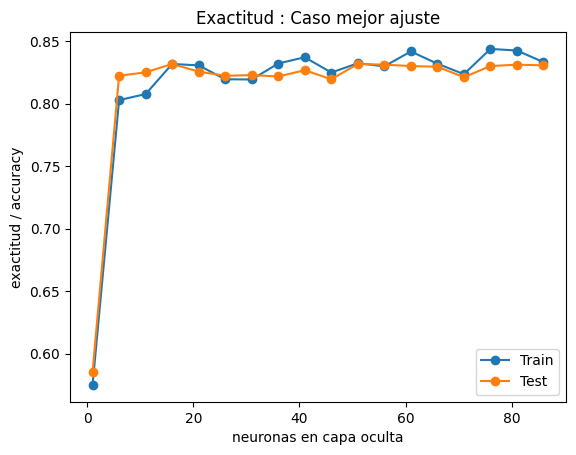

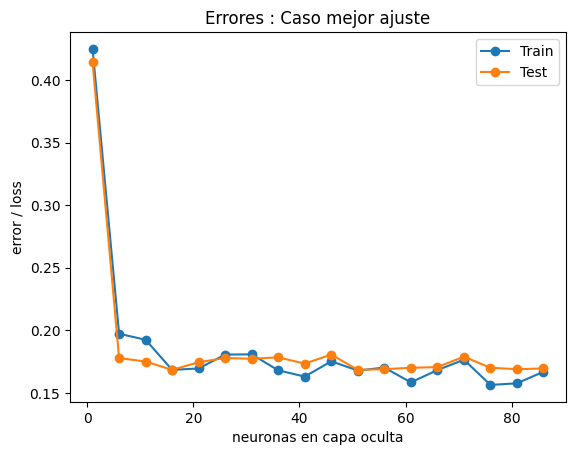

In [71]:
plt.plot(neuronas, train_scores, '-o', label='Train')
plt.plot(neuronas, test_scores, '-o', label='Test')
plt.legend()
plt.title('Exactitud : Caso mejor ajuste')
plt.xlabel('neuronas en capa oculta')
plt.ylabel('exactitud / accuracy')
plt.show()

plt.plot(neuronas, train_errors, '-o', label='Train')
plt.plot(neuronas, test_errors, '-o', label='Test')
plt.legend()
plt.title('Errores : Caso mejor ajuste')
plt.xlabel('neuronas en capa oculta')
plt.ylabel('error / loss')
plt.show()

### 12. Selecciona el mejor modelo encontrado en los incisos anteriores y utiliza el conjunto de prueba para obtener el desempeño final del modelo y su matriz de confusión.

In [72]:
model2 = MLPClassifier(hidden_layer_sizes=(76,76),
                        max_iter=1000,
                        alpha=0.7,
                        random_state=42)
model2.fit(x_train, np.ravel(y_train))
  # TRAIN set
train_yhat = model.predict(x_train)
train_loss = np.mean(abs(np.ravel(y_train) - train_yhat))
train_errors.append(train_loss)
train_acc = 1 - train_loss
train_scores.append(train_acc)
  # TEST set
test_yhat = model.predict(x_test)
test_loss = np.mean(abs(np.ravel(y_test) - test_yhat))
test_errors.append(test_loss)
test_acc = 1 - test_loss
test_scores.append(test_acc)

  # progreso de las épocas del entrenamiento ...
print(' train: %.3f, test: %.3f, losstrain: %.3f, losstest: %.3f' % (train_acc, test_acc, train_loss, test_loss))

 train: 0.833, test: 0.831, losstrain: 0.167, losstest: 0.169


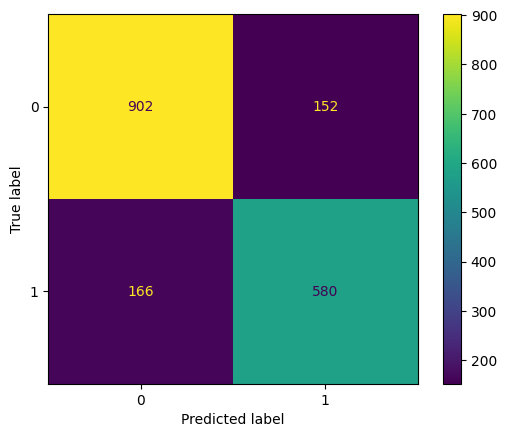

In [73]:
# Obtenemos la matriz de confusión
pr = modelo_RL.predict(x_test)
cm = confusion_matrix(y_test, pr)
ConfusionMatrixDisplay(cm).plot()